
**Implementation of Simple Linear Regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Descrption**

The dataset you're referring to is related to health insurance and contains 1338 rows of insured data. The information provided for each insured individual includes the following attributes:

Age: The age of the insured person.
Sex: The gender of the insured person.
BMI (Body Mass Index): A measure of body fat based on height and weight.
Number of Children: The number of children or dependents covered by the insurance.
Smoker: Indicates whether the insured person is a smoker or not.
Region: The geographic region of the insured person.
Additionally, the dataset includes the insurance charges associated with each individual. It seems like the dataset is well-structured with no missing or undefined values, making it suitable for analysis.

The dataset can be used to explore relationships between these attributes and the insurance charges. For example, you could analyze how age, gender, BMI, smoking status, and region impact the cost of health insurance. This kind of analysis could provide insights into risk underwriting in health insurance and help understand the factors influencing insurance premiums.

In [ ]:
data=pd.read_csv("insurance.csv")



** Exploratory Analytics**

In [ ]:
data.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

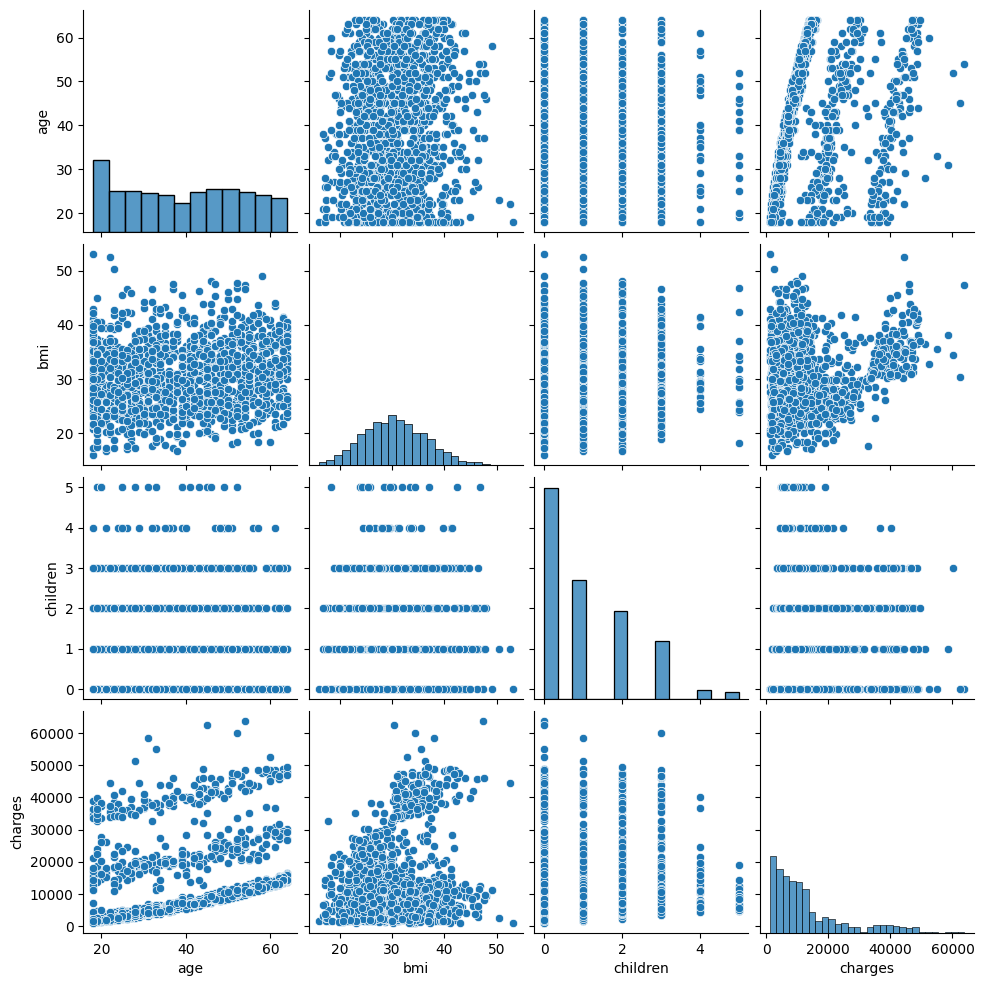

In [ ]:
sns.pairplot(data)

<ipython-input-8-67f5a22b11e7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


<Axes: xlabel='age', ylabel='Density'>

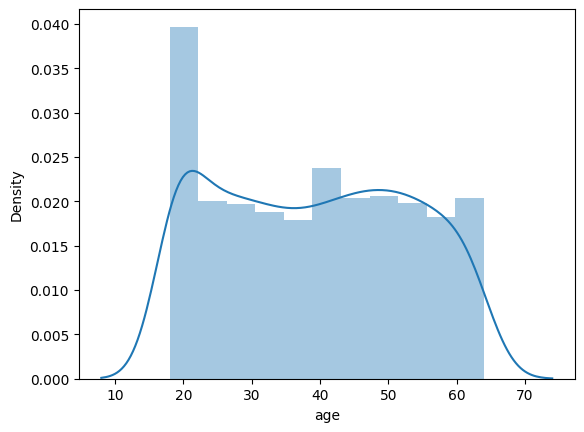

In [ ]:
sns.distplot(data['age'])

<ipython-input-9-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

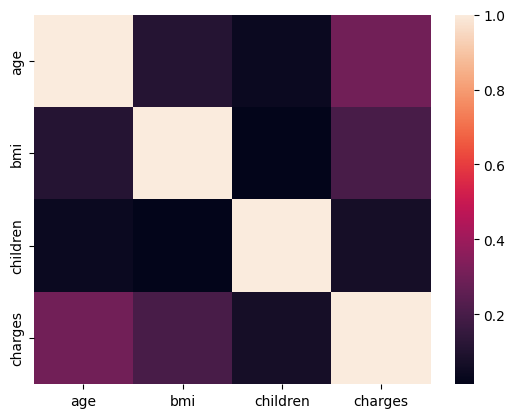

In [ ]:
sns.heatmap(data.corr())

In [ ]:
x=data.iloc[:,0:1].values
y=data.iloc[:,-1].values

In [ ]:
print(x)
print(y)

[[19]
 [18]
 [28]
 ...
 [18]
 [21]
 [61]]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


encoding


training and test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
print(x_train)
print(y_train)

[[53]
 [53]
 [18]
 ...
 [51]
 [40]
 [57]]
[10355.641  10065.413   1141.4451 ... 44641.1974 19444.2658 11554.2236]


Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)





**LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print(y_pred)
print(y_test)

[[ 7860.98  1646.43]
 [17569.74 11353.23]
 [16036.78  8798.59]
 [15525.79 10381.48]
 [ 8371.97  2103.08]
 [10926.9  38746.36]
 [15525.79  9304.7 ]
 [17314.25 11658.12]
 [ 9904.93  3070.81]
 [12459.87 19539.24]
 [18336.22 12629.9 ]
 [16803.26 11538.42]
 [12970.85  6338.08]
 [13737.34  7050.64]
 [ 7605.49  1137.47]
 [15270.3   8968.33]
 [11437.89 21984.47]
 [11948.88  6414.18]
 [18080.73 28287.9 ]
 [18847.21 13462.52]
 [16292.27  9722.77]
 [10671.41 40932.43]
 [14759.31  8026.67]
 [15781.29  8444.47]
 [ 7605.49  2203.47]
 [13481.84  6664.69]
 [13992.83  8606.22]
 [15270.3   8283.68]
 [11437.89  5375.04]
 [10671.41  3645.09]
 [17314.25 11674.13]
 [11693.39 11737.85]
 [16547.77 24873.38]
 [ 7860.98 33750.29]
 [15270.3  24180.93]
 [16547.77  9863.47]
 [10671.41 36837.47]
 [ 8371.97 17942.11]
 [17825.24 11856.41]
 [14503.82 39725.52]
 [10160.42  4349.46]
 [17825.24 11743.93]
 [15781.29 19749.38]
 [18080.73 12347.17]
 [10926.9   4931.65]
 [18336.22 30260.  ]
 [ 8116.47 27724.29]
 [10160.42 34

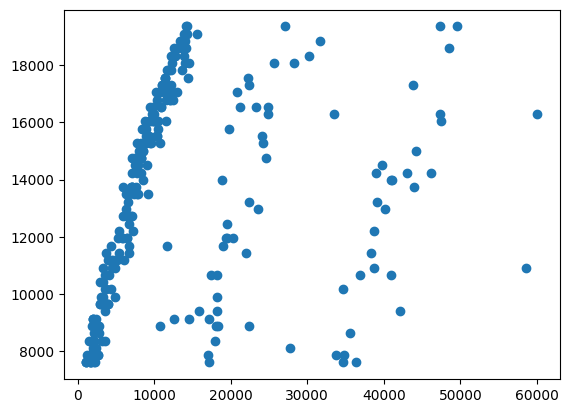

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 8944.67
Mean squared error = 137473581.65
Median absolute error = 6356.08
Explain variance score = 0.08
R2 score = 0.08


MULTIPLE REGRESSION

In [ ]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [ ]:
print(x)
print(y)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]
[16884.92  1725.55  4449.46 ...  1629.83  2007.94 29141.36]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))




In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-2])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

**Results**

In [ ]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print(y_pred)
print(y_test)

[[ 4.23e+14  1.65e+03]
 [ 4.23e+14  1.14e+04]
 [-2.74e+15  8.80e+03]
 [ 2.89e+15  1.04e+04]
 [-2.74e+15  2.10e+03]
 [ 4.23e+14  3.87e+04]
 [ 2.89e+15  9.30e+03]
 [-1.69e+15  1.17e+04]
 [-1.69e+15  3.07e+03]
 [ 2.89e+15  1.95e+04]
 [ 2.89e+15  1.26e+04]
 [-2.74e+15  1.15e+04]
 [ 2.89e+15  6.34e+03]
 [-2.74e+15  7.05e+03]
 [ 2.89e+15  1.14e+03]
 [-2.74e+15  8.97e+03]
 [ 4.23e+14  2.20e+04]
 [-2.74e+15  6.41e+03]
 [ 2.89e+15  2.83e+04]
 [-2.74e+15  1.35e+04]
 [-1.69e+15  9.72e+03]
 [ 2.89e+15  4.09e+04]
 [ 4.23e+14  8.03e+03]
 [-2.74e+15  8.44e+03]
 [-1.69e+15  2.20e+03]
 [ 4.23e+14  6.66e+03]
 [-1.69e+15  8.61e+03]
 [ 2.89e+15  8.28e+03]
 [-2.74e+15  5.38e+03]
 [-1.69e+15  3.65e+03]
 [-2.74e+15  1.17e+04]
 [-2.74e+15  1.17e+04]
 [-1.69e+15  2.49e+04]
 [ 4.23e+14  3.38e+04]
 [ 2.89e+15  2.42e+04]
 [ 4.23e+14  9.86e+03]
 [-2.74e+15  3.68e+04]
 [-2.74e+15  1.79e+04]
 [ 2.89e+15  1.19e+04]
 [ 4.23e+14  3.97e+04]
 [ 2.89e+15  4.35e+03]
 [ 4.23e+14  1.17e+04]
 [ 2.89e+15  1.97e+04]
 [-2.74e+15

In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 1976786570308034.0
Mean squared error = 4.9042954736922334e+30
Median absolute error = 2740634312136361.0
Explain variance score = -3.2852856783704334e+22
R2 score = -3.2852856783704334e+22


**dataset**
https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset